Problem formulation:

Formulate the problem as an MDP (Markov Decision Process). The state space can represent the current estimated positions, orientations, and velocities of all pedestrians, as well as the camera detections. Actions could correspond to different ways of matching and fusing the IMU and visual data for each pedestrian. The reward function should encourage accurate matching and localization.

When dealing with multiple people, each with their own IMU and visual detections, using RL for sensor fusion and localization can be even more beneficial. In this scenario, the reinforcement learning strategy can help in the following ways:

Multi-agent coordination: With multiple IMUs and visual detections, the RL strategy can be extended to a multi-agent setting. In this case, each agent (person) can have its own RL agent to fuse their respective IMU and visual data. Additionally, these RL agents can cooperate with each other to improve localization accuracy, for example by sharing information about their relative positions or collaborating to reduce uncertainties.

Handling occlusions and data association: In situations where people may be occluding each other in the camera's field of view, or where visual detections might be ambiguous, RL can help to resolve these issues by learning the best strategy to associate the correct visual detection with the corresponding IMU data. This can be particularly important when dealing with a crowded environment.

Adaptive sensor fusion: In a multi-person setting, the quality of sensor data can vary among individuals due to differences in sensor placement, calibration, or other factors. An RL-based approach can adapt the sensor fusion strategy for each person individually, optimizing the performance for each user and ensuring better localization accuracy overall.

Anomaly detection and outlier handling: The RL agent can learn to detect and handle anomalies in the sensor data or visual detections, such as faulty IMU readings or false-positive detections. This ability to recognize and deal with such issues can lead to a more robust and reliable localization system for multiple people.

Dynamic group formation: The RL agents can learn to form dynamic groups based on their proximity, relevance, or other factors, and adapt their sensor fusion strategies accordingly. This can help to improve localization accuracy, especially in complex environments where people are moving and interacting with each other.

In [1]:
import os

import torch

os.chdir('..')
import pandas as pd
wifi_df = pd.read_csv('../Services/data/raw.csv')
cam_df = pd.read_csv('../Services/data/cam_raw.csv')
imu_df = pd.read_csv('../Services/data/imu_raw.csv')

In [2]:
import logging
import sys
import datetime

# To use differen't log level for file and console
timestamp = datetime.datetime.utcnow().strftime('%Y%m%d_%H-%M-%S')
filename=f'tmp5a_{timestamp}.log'
formatter = logging.Formatter('[%(asctime)s] %(name)s {%(filename)s:%(lineno)d} %(levelname)s - %(message)s')

file_handler = logging.FileHandler(filename=filename)
file_handler.setLevel(logging.INFO)
file_handler.setFormatter(formatter)

stream_handler = logging.StreamHandler(sys.stdout)
stream_handler.setLevel(logging.INFO)

# The handlers have to be at a root level since they are the final output
logging.basicConfig(
    level=logging.DEBUG,
    format='[{%(filename)s:%(lineno)d} %(levelname)s - %(message)s',
    handlers=[
        file_handler,
        stream_handler
    ]
)

# Test
logger = logging.getLogger(__name__)
# logger.debug('This message should go to the log file')
# logger.info('This should go to the stdout and file')
# logger.warning('And this, too')
# print('filelog', open(filename).read())

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def draw_grid_map(data, vmax=255):

    # Create a colormap from dark blue to light blue
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "black"])

    # Create a grid color map
    plt.imshow(data, cmap=cmap, origin="lower", vmin=0, vmax=vmax)

    # Add a colorbar to show the intensity of the colors
    # plt.colorbar()

    # Set the ticks to show the index of the 2D array
    plt.xticks(np.arange(-0.5, data.shape[1], 1), [])
    plt.yticks(np.arange(-0.5, data.shape[0], 1), [])

    # Customize the grid appearance
    plt.gca().set_xticklabels([])
    plt.gca().set_yticklabels([])
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')

    # Show the grid lines
    plt.grid(True, which='both', color='k', linewidth=1)

    # Show the plot
    plt.show()

The RL agent is installed on each pedestrian's phone and the state space of the IMU contains only the local estimated position, orientation, and velocity, the approach to fuse data and match pedestrians can be adapted as follows:

Data association: Each RL agent will need to consider all the pedestrian detections from the camera in order to associate its local IMU data with the correct visual detection. The agent can learn a policy that takes into account its position, orientation, and velocity estimates from the IMU data, as well as the global visual detections, to find the best match.

Feature extraction and comparison: To facilitate data association, the RL agent may need to extract relevant features from both the IMU and visual data that can help in matching pedestrians. For example, it could use the IMU-derived velocity and orientation information to predict its appearance or location in the camera's field of view. The agent can then compare these predictions with the actual visual detections to find the best match.

Collaboration among pedestrians: If each pedestrian is equipped with an RL agent, they can cooperate by sharing information about their positions, orientations, and velocities. This collaboration can help improve the data association process by providing additional context and reducing ambiguities. The agents can communicate and collaborate in a decentralized manner, updating their policies and estimates based on the shared information.

Temporal consistency: The RL agent can still exploit temporal consistency to improve the matching process. By considering the historical data, the agent can learn a more robust policy that can handle temporary occlusions or noisy measurements. This can be achieved by incorporating memory components in the RL architecture, such as LSTM (Long Short-Term Memory) or GRU (Gated Recurrent Unit) layers.

By adjusting the approach to handle global visual detections, the RL agents on each pedestrian's phone can still effectively fuse local IMU data with the camera's pedestrian detections and match the pedestrians correctly. This can result in more accurate and robust localization in dynamic environments with multiple pedestrians.

The x-axis  is the 10 different short tracklet during the time window, the y-axis is the local IMU data. The color represents the probability to assign. To assign the IMU to visual tracklet, we expect grids on the diagonal to be darker.

In [4]:
import gymnasium as gym
import RL

env = gym.make('RL/RLfuse-v0')
env.load_data(wifi_df, cam_df, imu_df, timelength=50)

Using cache found in C:\Users\liuxi/.cache\torch\hub\huggingface_pytorch-transformers_main
C:\Users\liuxi\anaconda3\envs\WirelessDT\lib\site-packages\gymnasium\utils\passive_env_checker.py:35: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (150, 20)
  logger.warn(
C:\Users\liuxi\anaconda3\envs\WirelessDT\lib\site-packages\gymnasium\utils\passive_env_checker.py:35: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (150, 6)
  logger.warn(
C:\Users\liuxi\anaconda3\envs\WirelessDT\lib\site-packages\gymnasium\utils\passive_env_checker.py:22: UserWarning: WARN: It seems a Box observation spac

In [5]:
from RL.algorithm.rlfuse_ppo import Rlfuse_ppo
agent = Rlfuse_ppo(env, logger, fill_value=0.05, lr=0.0025, load_weight=False)
agent.learn(100000)

[{rlfuse_ppo.py:75} INFO - Setting up logger...
[{rlfuse_ppo.py:257} INFO - Learnilng at timestep: 0


C:\Users\liuxi\anaconda3\envs\WirelessDT\lib\site-packages\gymnasium\utils\passive_env_checker.py:181: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
C:\Users\liuxi\anaconda3\envs\WirelessDT\lib\site-packages\gymnasium\utils\passive_env_checker.py:181: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
C:\Users\liuxi\anaconda3\envs\WirelessDT\lib\site-packages\gymnasium\utils\passive_env_checker.py:268: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'tuple'>
  logger.warn(


KeyboardInterrupt: 

TO-DO:
1. add more AI to the scene, display performance (e.g. matching success rate)
2. add label order shuffle;
3. add validation set
4. add noise to data
5. add time step interval (e.g. 5 time step between each selection?)

In [9]:
np.log(1)

0.0

C:\Users\liuxi\AppData\Local\Temp\ipykernel_31936\1526300398.py:7: RuntimeWarning: divide by zero encountered in log
  entropy = np.clip(np.log(prob), a_min=-10, a_max=None)


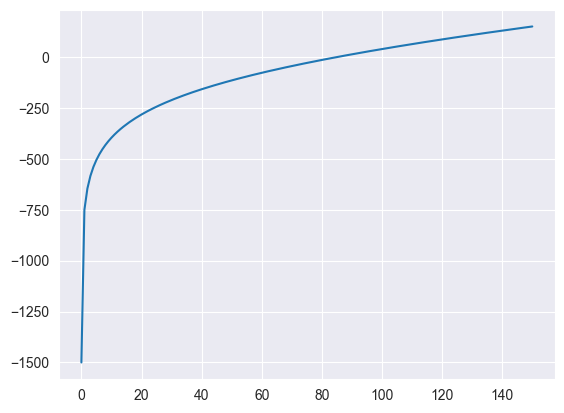

In [60]:
import numpy as np
def calculate_reward(reward):
    # Calculate the matching probability
    prob = np.mean(reward)

    # Calculate the entropy of the matching probabilities
    entropy = np.clip(np.log(prob), a_min=-10, a_max=None)

    # Add the entropy bonus to the reward
    reward = np.array(reward) + entropy

    return sum(reward)
def generate_lists(n):
    lists = []
    initial = [0]*n
    lists.append(initial)
    for i in range(n):
        temp_list = initial.copy()
        for j in range(i+1):
            temp_list[j] = 1
        lists.append(temp_list)
    return lists

reward_lists = generate_lists(150)

import matplotlib.pyplot as plt
outputs = []
for list in reward_lists:
    outputs.append(calculate_reward(list))
plt.plot(outputs)
plt.show()

In [11]:
agent_eval = Rlfuse_ppo(env, load_weight=True)
obs, info = env.get_evaluate_obs(170)
action = agent_eval.evaluate_action(obs)
action_idx, reward = env.evaluate_action(action)
imu_vis = obs[0]

In [13]:
sum(reward)

35

In [45]:
highest_probabilities = np.max(action, axis=-1).squeeze()
max_indices = np.squeeze(np.argmax(action, axis=-1))

# Replace indices with -1 where the highest probability is lower than 0.5
modified_indices = np.where(highest_probabilities >= 0.7, max_indices, -1)

# Convert the modified_indices numpy array to a list
modified_indices_list = modified_indices.tolist()

In [17]:
from RL.agent.fusion_model_v2 import FusionModelv2
from RL.agent.fusion_model_v4 import FusionModelv4
from RL.agent.dotProductAttention import DotProductAttention

# model = FusionModelv2(imu_feature_size=32, visual_feature_size=32, lstm_hidden_size=64, max_pedestrian_detections=10, num_classes=10)
#
# input_list = np.random.rand(10, 50, 10, 2)
# imu_list = np.random.rand(10, 50, 6)
# input = torch.from_numpy(input_list).float()
# input_imu = torch.from_numpy(imu_list).float()
# input = (input_imu, input)

In [18]:
model = FusionModelv4(wifi_feature_size=32, imu_feature_size=32, visual_feature_size=64, lstm_hidden_size=64, max_pedestrian_detections=10, num_classes=10)
attention = DotProductAttention()
# Example usage:
batch_size = 4
sequence_length = 10
d_model = 64

# Create random tensors for query, key, and value
query = torch.randn(batch_size, sequence_length, d_model)
key = torch.randn(batch_size, sequence_length, d_model)
value = torch.randn(batch_size, sequence_length, d_model)

# Compute the attended output
attended_output = attention(query, key, value)
print(attended_output.shape)

torch.Size([4, 10, 64])
